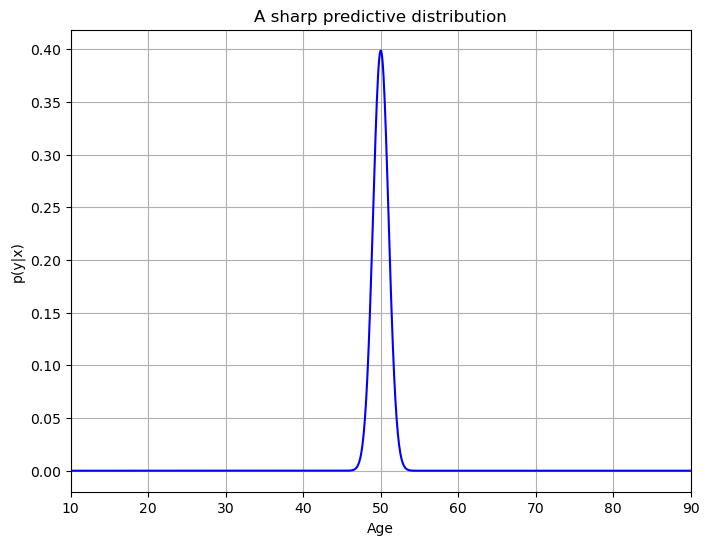

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the Gaussian distribution
mu = 50  # mean
sigma = 1  # standard deviation

# Creating a range of values for x (age)
x = np.linspace(10, 90, 1000)

# Calculating the probability density function (PDF) of the Gaussian distribution
p_y_given_x = norm.pdf(x, mu, sigma)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, p_y_given_x, color='blue')
plt.title('A sharp predictive distribution')
plt.xlabel('Age')
plt.ylabel('p(y|x)')
plt.xlim(10, 90)
plt.grid(True)
plt.show()


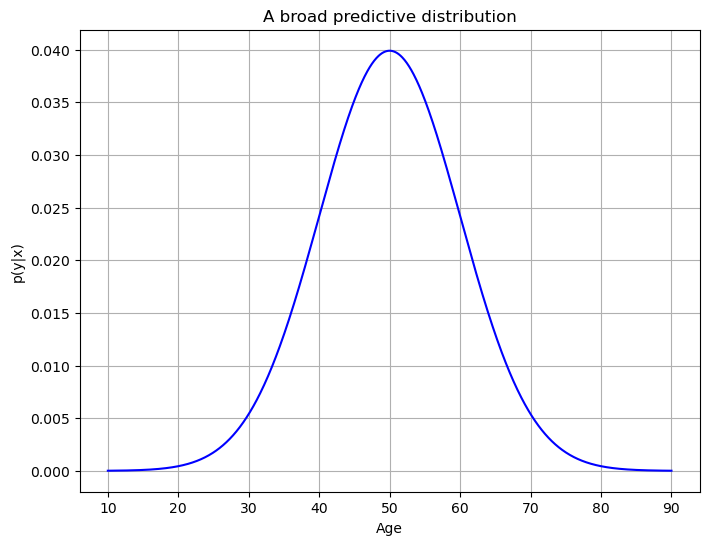

In [2]:
# Adjusting the standard deviation
sigma = 10  # new standard deviation


# Recalculating the probability density function (PDF) of the Gaussian distribution
p_y_given_x = norm.pdf(x, mu, sigma)

# Replotting
plt.figure(figsize=(8, 6))
plt.plot(x, p_y_given_x, color='blue')
plt.title('A broad predictive distribution')
plt.xlabel('Age')
plt.ylabel('p(y|x)')
plt.grid(True)
plt.show()


## Score Divergence for NLL (log-Score)

We assume a fixed value of \( x \)

The Score Divergence of the NLL is the KL-Divergence.

$$
D(G, P) = \int S(p(y'|x), y') g(y'|x) dy' - \int S(g(y'|x), y') g(y'|x) dy'
$$

$$
= -\int \ln(p(y'|x)) g(y'|x) dy' - \left( -\int \ln(g(y'|x)) g(y'|x) dy' \right)
$$
<!-- $$
= -\mathbb{E}_{G}[\ln(p(y'|x))] + \mathbb{E}_{G}[\ln(g(y'|x))]
$$ -->
$$
= \int g(y'|x) \ln \left( \frac{g(y'|x)}{p(y'|x)} \right) dy'
$$
$$
= D_{KL} (G \| P)
$$

\( D_{KL}(G \| P) \geq 0 \) and \( D_{KL}(G \| P) = 0 \iff P = G \)

\( \Rightarrow \) NLL is strictly proper scoring rule


1.2067083030096615
0.5158422296716948
0.4422402371843583
1.4381563021219272
1.0448490172033256


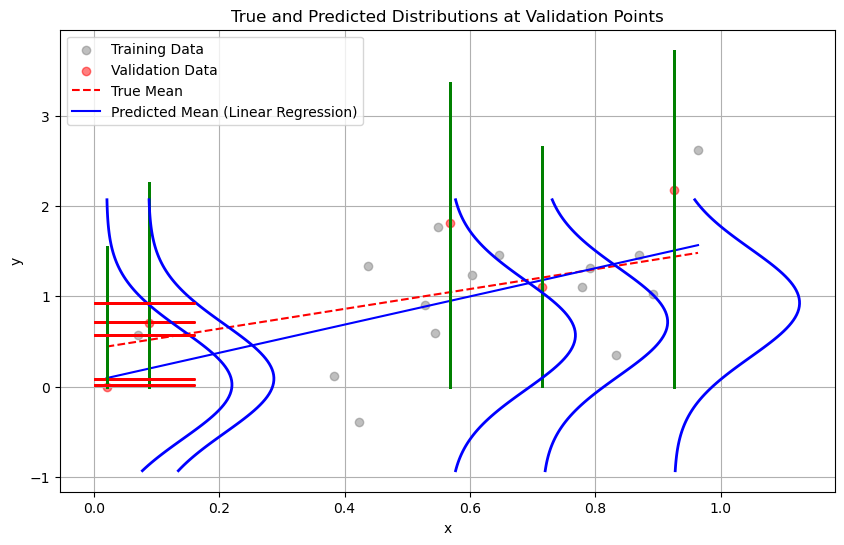

In [33]:
from sklearn.linear_model import LinearRegression
import numpy as np
np.random.seed(0)  # For reproducibility
N = 20  # Number of data points

# A simple data generating process 
x = np.random.uniform(0,1,N) # N values for x
y = np.random.normal(1.1 * x + 0.42, 0.5, N)

# Sorting the x values for plotting
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
y_sorted = y[sorted_indices]

y_true_mean = 1.1 * x_sorted + 0.42
# Let's split the data into training and validation sets first.
# Since we want to choose 5 points for validation, we'll use random choice for this.

validation_indices = np.random.choice(np.arange(N), size=5, replace=False)
training_indices = np.setdiff1d(np.arange(N), validation_indices)

# Split the data
x_train, y_train = x[training_indices], y[training_indices]
x_val, y_val = x[validation_indices], y[validation_indices]

# Perform linear regression on the training data
lin_reg = LinearRegression()
lin_reg.fit(x_train.reshape(-1, 1), y_train)

# Predicting across the entire range of x
y_pred_lin_reg = lin_reg.predict(x_sorted.reshape(-1, 1))

# Calculating residuals and standard deviation of the residuals for training data
residuals_train = y_train - lin_reg.predict(x_train.reshape(-1, 1))
std_residuals_train = np.std(residuals_train)

# Create the plot
plt.figure(figsize=(10, 6))

# Scatter plot for training data
plt.scatter(x_train, y_train, color='grey', alpha=0.5, label='Training Data')

# Scatter plot for validation data
plt.scatter(x_val, y_val, color='red', alpha=0.5, label='Validation Data')

# True mean line (without noise)
plt.plot(x_sorted, y_true_mean, 'r--', label='True Mean')

# Linear regression predicted mean line
plt.plot(x_sorted, y_pred_lin_reg, 'b-', label='Predicted Mean (Linear Regression)')

# Plot the prediction and true distributions at the validation points
num_points_pdf = 100
for val_x, val_y in zip(x_val, y_val):
    y_pdf = np.linspace(y_true_mean_pdf - 3 * 0.5, y_true_mean_pdf + 3 * 0.5, num_points_pdf)
    # For true PDF (red)
    y_pdf = np.linspace(norm.pdf(y_pdf, loc=val_x, scale=0.5), norm.ppf(0.999, loc=val_y, scale=0.5), 100)
    pdf = norm.pdf(y_pdf, loc=val_y, scale=0.5)
    plt.plot(np.full_like(y_pdf, val_x), y_pdf, 'g', lw=2)


    
    y_true_mean_pdf = 1.1 * val_x + 0.42  # The true distribution
    print(y_true_mean_pdf)
    y_pdf = np.linspace(y_true_mean_pdf - 3 * 0.5, y_true_mean_pdf + 3 * 0.5, num_points_pdf)
    y_pdf = norm.pdf(y_pdf, loc=y_true_mean_pdf, scale=0.5)  # The true distribution
    y_pdf = y_pdf  * 0.2  # Scaling for plotting
    plt.plot(y_pdf,np.full(fill_value=val_x, shape=y_pdf.shape), 'r-', lw=2)
    
    # Predicted PDF
    pred_mean = lin_reg.predict([[val_x]])[0]
    y_pred_pdf = norm.pdf(x_pdf, loc=val_x, scale=std_residuals_train) * std_residuals_train * np.sqrt(2 * np.pi)
    y_pred_pdf = y_pred_pdf / y_pred_pdf.max() * 0.2
    plt.plot(y_pred_pdf + val_x, x_pdf,'b-', lw=2)

# Labels, title and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('True and Predicted Distributions at Validation Points')
plt.legend()
plt.grid(True)
plt.show()